<a href="https://colab.research.google.com/github/ycarrera01/Proyecto-Final-Modelos-Predictivos/blob/main/Aplicaci%C3%B3n_de_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
file_path = '/content/Dataset.xlsx'

In [29]:
# Leer el archivo de Excel
data = pd.read_excel(file_path)

# Mostrar las primeras filas
print(data.head())

  Fe.contab.    Material  Total Producido (Unidades)  Total de Producción (Ca)
0 2022-01-03  HEGRFL0824                       32400                     180.0
1 2022-01-04  HEGRFL0824                       38880                     216.0
2 2022-01-05  HEGRFL0824                       45000                     250.0
3 2022-01-06  HEGRFL0824                       51660                     287.0
4 2022-01-07  HEGRFL0824                       45000                     250.0


In [44]:
# Filtrar los datos por el material específico (ejemplo: HEGRFL0824)
material_1_data = data[data['Material'] == 'HEGRFL0824']
material_2_data = data[data['Material'] == 'HSGRFL0655']

print(material_1_data.head())
print(material_2_data.head())

  Fe.contab.    Material  Total Producido (Unidades)  Total de Producción (Ca)
0 2022-01-03  HEGRFL0824                       32400                     180.0
1 2022-01-04  HEGRFL0824                       38880                     216.0
2 2022-01-05  HEGRFL0824                       45000                     250.0
3 2022-01-06  HEGRFL0824                       51660                     287.0
4 2022-01-07  HEGRFL0824                       45000                     250.0
    Fe.contab.    Material  Total Producido (Unidades)  \
955 2022-01-03  HSGRFL0655                       25920   
956 2022-01-04  HSGRFL0655                       38880   
957 2022-01-05  HSGRFL0655                       51840   
958 2022-01-06  HSGRFL0655                       32160   
959 2022-01-07  HSGRFL0655                       38400   

     Total de Producción (Ca)  
955                     108.0  
956                     162.0  
957                     216.0  
958                     134.0  
959              

**Inciaremos a evaluando la estacionareidad de los datos mediante La Prueba ADF (Dickey-Fuller)**

In [31]:
from statsmodels.tsa.stattools import adfuller

# Suponiendo que ya tienes la serie temporal seleccionada
serie_temporal = material_1_data['Total de Producción (Ca)'].dropna()

# Realizar la prueba ADF
adf_result = adfuller(serie_temporal)

# Extraer el valor p de los resultados
p_value = adf_result[1]

# Mostrar el valor p
print(f'El valor p de la prueba ADF es: {p_value}')

El valor p de la prueba ADF es: 0.021979367047474996


El valor de P para el material 1 indica que podemos rechazar la hipótesis Nula, es decir que la serie temporal es estacionaria.


In [32]:
from statsmodels.tsa.stattools import adfuller

# Suponiendo que ya tienes la serie temporal seleccionada
serie_temporal = material_2_data['Total de Producción (Ca)'].dropna()

# Realizar la prueba ADF
adf_result = adfuller(serie_temporal)

# Extraer el valor p de los resultados
p_value = adf_result[1]

# Mostrar el valor p
print(f'El valor p de la prueba ADF es: {p_value}')

El valor p de la prueba ADF es: 0.23719855848892785


El valor de P para el material 2, indica que no podemos rechazar la hipotesis nula, es decir que esta serie temporal no es estacionaria.


**Con los resultados obtenidos aplicaré una diferenciación de primer grado al material 2 para estacionalizar y poder aplicar ARIMA a ambos.**


In [33]:

material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'], errors='coerce')

# Verifica que la columna 'Fe.contab.' ahora sea de tipo datetime
print(material_2_data['Fe.contab.'].dtype)  # Esto debe mostrar 'datetime64[ns]'

# Mostrar las primeras filas para confirmar el formato
print(material_2_data[['Fe.contab.']].head())


datetime64[ns]
    Fe.contab.
955 2022-01-03
956 2022-01-04
957 2022-01-05
958 2022-01-06
959 2022-01-07


<ipython-input-33-fb4633463c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'], errors='coerce')


In [34]:
# Supongamos que material_2_data contiene la serie temporal del material 2
material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'], errors='coerce')

# Aplicar diferenciación de primer orden (nivel)
material_2_data['Differenced'] = material_2_data['Total de Producción (Ca)'].diff()

# Mostrar las primeras filas para verificar la diferenciación
print(material_2_data[['Total de Producción (Ca)', 'Differenced']].head())

     Total de Producción (Ca)  Differenced
955                     108.0          NaN
956                     162.0         54.0
957                     216.0         54.0
958                     134.0        -82.0
959                     160.0         26.0


<ipython-input-34-788809de65c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'], errors='coerce')
<ipython-input-34-788809de65c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Differenced'] = material_2_data['Total de Producción (Ca)'].diff()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba ADF sobre la serie diferenciada
result = adfuller(material_2_data['Differenced'].dropna())  # dropna() para eliminar valores nulos generados por la diferenciación
print(f"Valor p de la prueba ADF: {result[1]}")

Valor p de la prueba ADF: 4.044507145177878e-30


Realizado esto ambas series son estacionarias, ahora podemos aplicar el método Arima


<ipython-input-15-d8103ec55650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Total de Producción (Ca) Diferenciado'] = material_2_data['Total de Producción (Ca)'].diff()
<ipython-input-15-d8103ec55650>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data.dropna(inplace=True)


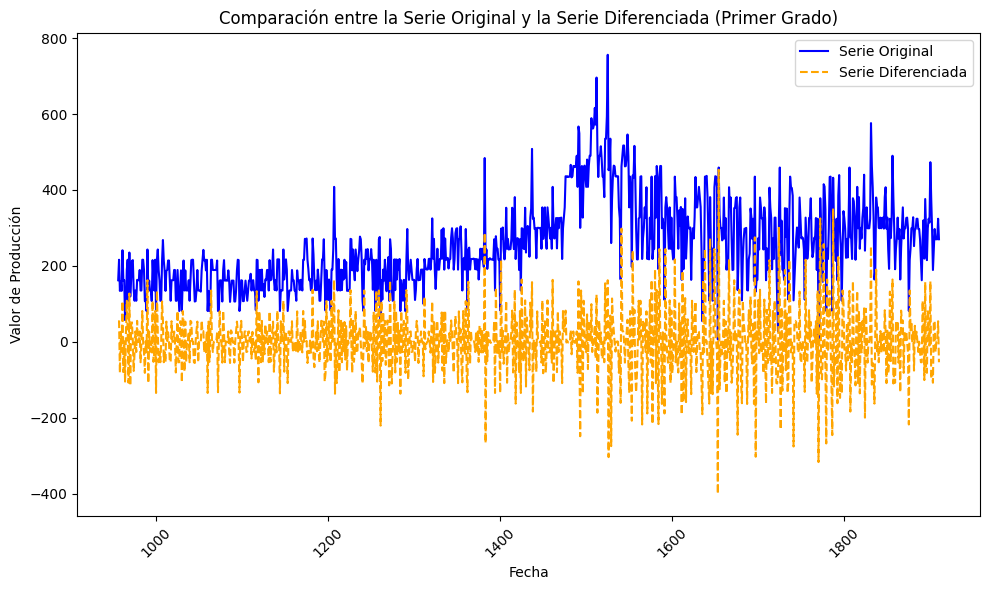

In [ ]:
import matplotlib.pyplot as plt

# Aplicar la diferenciación de primer orden
material_2_data['Total de Producción (Ca) Diferenciado'] = material_2_data['Total de Producción (Ca)'].diff()

# Eliminar los valores NaN generados por la diferenciación
material_2_data.dropna(inplace=True)

# Graficar los datos originales y la serie diferenciada
plt.figure(figsize=(10, 6))

# Graficar la serie original
plt.plot(material_2_data.index, material_2_data['Total de Producción (Ca)'], label='Serie Original', color='blue')

# Graficar la serie diferenciada de primer grado
plt.plot(material_2_data.index, material_2_data['Total de Producción (Ca) Diferenciado'], label='Serie Diferenciada', color='orange', linestyle='--')

# Agregar título y etiquetas
plt.title('Comparación entre la Serie Original y la Serie Diferenciada (Primer Grado)')
plt.xlabel('Fecha')
plt.ylabel('Valor de Producción')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)  # Para rotar las fechas si es necesario
plt.tight_layout()
plt.show()

Se observa el comparativo y con la diferenciada las fluctuaciones se visualiza con una menor fluctuación a lo largo del tiempo lo me indica que estamos en un buen momento para iniciar con el modelado.

**ARIMA**

In [8]:

from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA para Material 1 con p=1, d=0, q=1 para 'Total de Producción (Ca)'
model = ARIMA(material_1_data['Total de Producción (Ca)'], order=(1, 0, 1))
fitted_model = model.fit()

# Mostrar resumen del modelo
print(fitted_model.summary())

# Asegúrate de que la columna 'Fe.contab.' es de tipo datetime
material_1_data['Fe.contab.'] = pd.to_datetime(material_1_data['Fe.contab.'])

# Realizar predicciones para los próximos 291 días
predictions = fitted_model.forecast(steps=291)
print(predictions)



                                  SARIMAX Results                                   
Dep. Variable:     Total de Producción (Ca)   No. Observations:                  955
Model:                       ARIMA(1, 0, 1)   Log Likelihood               -5472.937
Date:                      Tue, 08 Apr 2025   AIC                          10953.874
Time:                              22:17:43   BIC                          10973.321
Sample:                                   0   HQIC                         10961.282
                                      - 955                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.5241     28.752      9.757      0.000     224.171     336.877
ar.L1          0.9933      0.004    258.195      0.000       0.986       1.001
ma.L

<ipython-input-8-4ed2979cd336>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_1_data['Fe.contab.'] = pd.to_datetime(material_1_data['Fe.contab.'])


Un valor p cercano a 0 indica que los residuos no son independientes, es decir, hay autocorrelación en los residuos. En este caso, 0.00 es altamente significativo, lo que sugiere que el modelo ARIMA podría no estar capturando toda la estructura de la serie temporal. Hay autocorrelación en los residuos y, por lo tanto, el modelo necesita ajustes.


In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Asegúrate de que 'material_2_data' tiene el índice temporal adecuado
material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'])

# Establecer la columna de fechas como índice temporal
material_2_data.set_index('Fe.contab.', inplace=True)

# Diferenciación de la serie temporal para hacerla estacionaria (d=1)
material_2_data['Total de Producción (Ca)'] = material_2_data['Total de Producción (Ca)'].diff().dropna()

# Ajustar el modelo ARIMA para la serie diferenciada (Total de Producción (Ca)_diff)
model = ARIMA(material_2_data['Total de Producción (Ca)'].dropna(), order=(1, 1, 1))

# Ajustar el modelo
fitted_model = model.fit()

# Mostrar el resumen del modelo ajustado
print(fitted_model.summary())

# Realizar predicciones para los próximos 291 días sobre la serie diferenciada
predictions_diff = fitted_model.forecast(steps=291)

# Recuperar las predicciones para la serie original (integración inversa)
# La predicción es de la serie diferenciada, por lo que debes agregarla al último valor original de la serie
last_value = material_2_data['Total de Producción (Ca)'].iloc[-1]
predictions_original = last_value + predictions_diff.cumsum()  # Se recuperan los valores originales

# Mostrar las predicciones
print(predictions_original)



<ipython-input-12-e95adf01f1a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'])
<ipython-input-12-e95adf01f1a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_2_data['Total de Producción (Ca)'] = material_2_data['Total de Producción (Ca)'].diff().dropna()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency infor

                                  SARIMAX Results                                   
Dep. Variable:     Total de Producción (Ca)   No. Observations:                  955
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -5567.537
Date:                      Tue, 08 Apr 2025   AIC                          11141.074
Time:                              22:54:44   BIC                          11155.655
Sample:                                   0   HQIC                         11146.628
                                      - 955                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3509      0.025    -13.787      0.000      -0.401      -0.301
ma.L1         -0.9993      0.057    -17.496      0.000      -1.111      -0.887
sigm

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


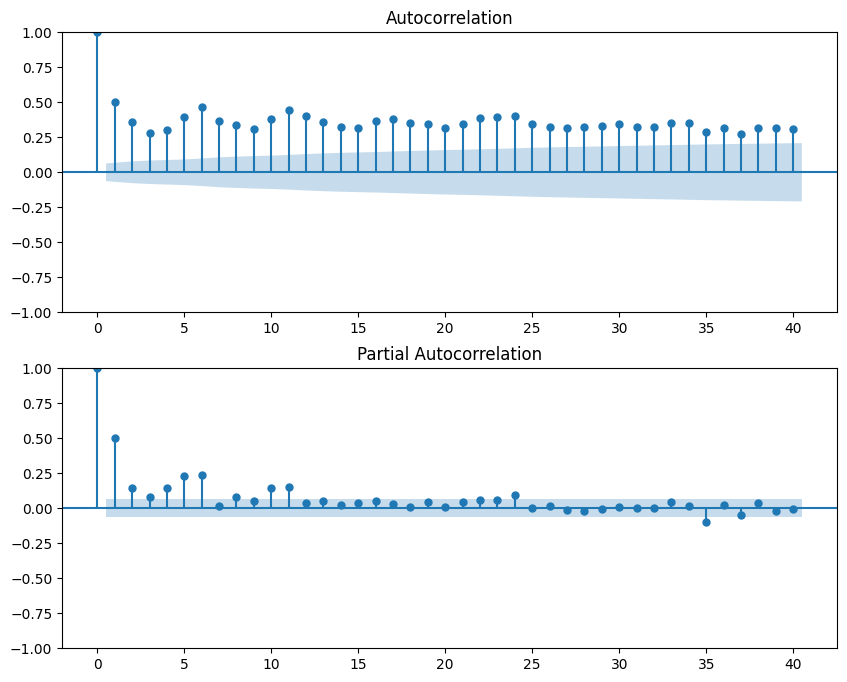

In [ ]:

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asumiendo que la información de material 1 ya está preparada y es estacionaria
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig = sm.graphics.tsa.plot_acf(material_1_data['Total de Producción (Ca)'], lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(material_1_data['Total de Producción (Ca)'], lags=40, ax=ax[1])
plt.show()




Si la ACF no decae rápido o la PACF tiene rezago, la serie no parece ser estacionaria

**APLICACIÓN DE WINTER Y HOLT**


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Preparación para Material 1 (suponiendo que ya está en el mismo formato que data_global)
# Asegúrate de tener la columna 'Fe.contab.' (fecha) y 'Total de Producción (Ca)' o el nombre correcto
material_1_data = material_1_data[['Fe.contab.', 'Total de Producción (Ca)']].copy()

# Convertir la columna de fechas al formato datetime
material_1_data['Fe.contab.'] = pd.to_datetime(material_1_data['Fe.contab.'])

# Eliminar duplicados, si los hay, y agrupar por fecha sumando los valores
material_1_data = material_1_data.groupby('Fe.contab.').sum().reset_index()

# Establecer la fecha como índice
material_1_data.set_index('Fe.contab.', inplace=True)

# Asegurarse de que los datos estén en frecuencia diaria y rellenar los valores faltantes
material_1_data = material_1_data[['Total de Producción (Ca)']].asfreq('D').ffill()

# Mostrar las primeras filas para verificar
print(material_1_data.head())

            Total de Producción (Ca)
Fe.contab.                          
2022-01-03                     180.0
2022-01-04                     216.0
2022-01-05                     250.0
2022-01-06                     287.0
2022-01-07                     250.0


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Preparación para Material 2 (suponiendo que ya está en el mismo formato que data_global)

material_2_data = material_2_data[['Fe.contab.', 'Total de Producción (Ca)']].copy()

# Convertir la columna de fechas al formato datetime
material_2_data['Fe.contab.'] = pd.to_datetime(material_2_data['Fe.contab.'])

# Eliminar duplicados, si los hay, y agrupar por fecha sumando los valores
material_2_data = material_2_data.groupby('Fe.contab.').sum().reset_index()

# Establecer la fecha como índice
material_2_data.set_index('Fe.contab.', inplace=True)

# Asegurarse de que los datos estén en frecuencia diaria y rellenar los valores faltantes
material_2_data = material_2_data[['Total de Producción (Ca)']].asfreq('D').ffill()

# Mostrar las primeras filas para verificar
print(material_2_data.head())

            Total de Producción (Ca)
Fe.contab.                          
2022-01-03                     108.0
2022-01-04                     162.0
2022-01-05                     216.0
2022-01-06                     134.0
2022-01-07                     160.0


In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Ajustar el modelo Holt-Winters con tendencia y estacionalidad aditiva para Material 1
hw_model_material_1 = ExponentialSmoothing(
    material_1_data['Total de Producción (Ca)'],
    trend='add',        # Tendencia aditiva
    seasonal='add',     # Estacionalidad aditiva
    seasonal_periods=12 # Estacionalidad anual (ajustar según corresponda, por ejemplo, 12 meses si es mensual)
).fit()

# Hacer predicciones para los próximos 291 días restantes del año
hw_forecast_material_1 = hw_model_material_1.forecast(steps=291)

# Mostrar las predicciones
print(hw_forecast_material_1)

955     250.479919
956     261.800292
957     246.889476
958     251.251644
959     256.737837
           ...    
1241    206.797334
1242    223.175017
1243    201.629029
1244    212.949401
1245    198.038586
Length: 291, dtype: float64


In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Ajustar el modelo Holt-Winters con tendencia y estacionalidad aditiva para Material 2
hw_model_material_2 = ExponentialSmoothing(
    material_2_data['Total de Producción (Ca)'],
    trend='add',        # Tendencia aditiva
    seasonal='add',     # Estacionalidad aditiva
    seasonal_periods=12 # Estacionalidad anual (ajustar según corresponda, por ejemplo, 12 meses si es mensual)
).fit()

# Hacer predicciones para los próximos 291 días restantes del año
hw_forecast_material_1 = hw_model_material_1.forecast(steps=291)

# Mostrar las predicciones
print(hw_forecast_material_1)

955     250.479919
956     261.800292
957     246.889476
958     251.251644
959     256.737837
           ...    
1241    206.797334
1242    223.175017
1243    201.629029
1244    212.949401
1245    198.038586
Length: 291, dtype: float64


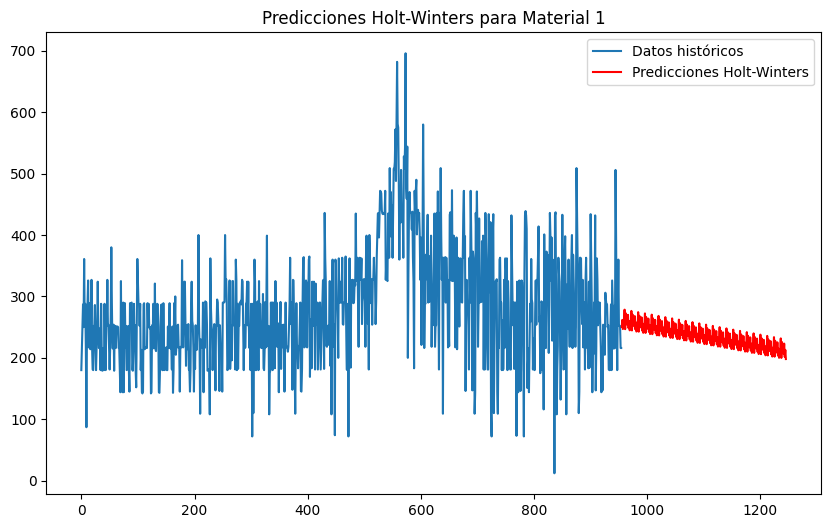

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Ajustar el modelo Holt-Winters con tendencia y estacionalidad aditiva para Material 1
hw_model_material_1 = ExponentialSmoothing(
    material_1_data['Total de Producción (Ca)'],
    trend='add',        # Tendencia aditiva
    seasonal='add',     # Estacionalidad aditiva
    seasonal_periods=12 # Estacionalidad anual (ajustar según corresponda, por ejemplo, 12 meses si es mensual)
).fit()

# Hacer predicciones para los próximos 291 días restantes del año 2025
hw_predictions = hw_model_material_1.forecast(steps=291)

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(material_1_data.index, material_1_data['Total de Producción (Ca)'], label='Datos históricos')
plt.plot(hw_predictions.index, hw_predictions, label='Predicciones Holt-Winters', color='red')
plt.title("Predicciones Holt-Winters para Material 1")
plt.legend()
plt.show()

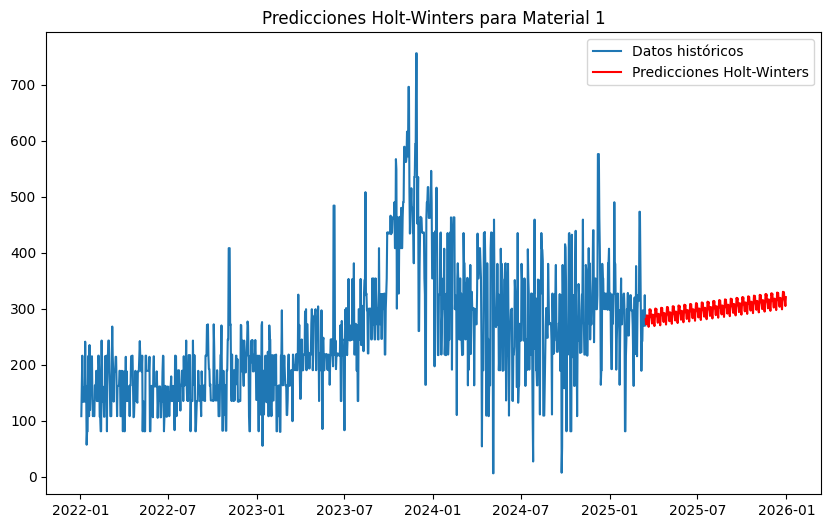

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Ajustar el modelo Holt-Winters con tendencia y estacionalidad aditiva para Material 1
hw_model_material_2 = ExponentialSmoothing(
    material_2_data['Total de Producción (Ca)'],
    trend='add',        # Tendencia aditiva
    seasonal='add',     # Estacionalidad aditiva
    seasonal_periods=12 # Estacionalidad anual (ajustar según corresponda, por ejemplo, 12 meses si es mensual)
).fit()

# Hacer predicciones para los próximos 291 días restantes del año 2025
hw_predictions = hw_model_material_2.forecast(steps=291)

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(material_2_data.index, material_2_data['Total de Producción (Ca)'], label='Datos históricos')
plt.plot(hw_predictions.index, hw_predictions, label='Predicciones Holt-Winters', color='red')
plt.title("Predicciones Holt-Winters para Material 1")
plt.legend()
plt.show()

**Comparación**

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Dividir los datos en entrenamiento y prueba (últimos 291 días como prueba)
train = material_1_data['Total de Producción (Ca)'][:-291]
test = material_1_data['Total de Producción (Ca)'][-291:]

# ------------------------------------
# Ajustar el modelo ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
fitted_arima = arima_model.fit()

# Predicciones del modelo ARIMA
arima_predictions = fitted_arima.forecast(steps=len(test))
arima_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Ajustar el modelo Holt-Winters
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

# Predicciones del modelo Holt-Winters
hw_predictions = hw_model.forecast(steps=len(test))
hw_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Calcular MAD para ARIMA y Holt-Winters
mad_arima = mean_absolute_error(test, arima_predictions)
mad_hw = mean_absolute_error(test, hw_predictions)

print(f"MAD ARIMA: {mad_arima}")
print(f"MAD Holt-Winters: {mad_hw}")

# ------------------------------------
# Calcular MAPE para ARIMA y Holt-Winters
def mape(y_true, y_pred):
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_arima = mape(test, arima_predictions)
mape_hw = mape(test, hw_predictions)

print(f"MAPE ARIMA: {mape_arima}")
print(f"MAPE Holt-Winters: {mape_hw}")

# ------------------------------------
# Calcular RMSE para ARIMA y Holt-Winters
rmse_arima = np.sqrt(mean_squared_error(test, arima_predictions))
rmse_hw = np.sqrt(mean_squared_error(test, hw_predictions))

print(f"RMSE ARIMA: {rmse_arima}")
print(f"RMSE Holt-Winters: {rmse_hw}")

MAD ARIMA: 84.9303555607565
MAD Holt-Winters: 73.69208507938669
MAPE ARIMA: 51.57480382884283
MAPE Holt-Winters: 41.49595270211343
RMSE ARIMA: 104.71443418465658
RMSE Holt-Winters: 93.08949092110458


In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Dividir los datos en entrenamiento y prueba (últimos 291 días como prueba)
train = material_2_data['Total de Producción (Ca)'][:-291]
test = material_2_data['Total de Producción (Ca)'][-291:]

# ------------------------------------
# Ajustar el modelo ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
fitted_arima = arima_model.fit()

# Predicciones del modelo ARIMA
arima_predictions = fitted_arima.forecast(steps=len(test))
arima_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Ajustar el modelo Holt-Winters
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

# Predicciones del modelo Holt-Winters
hw_predictions = hw_model.forecast(steps=len(test))
hw_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Calcular MAD para ARIMA y Holt-Winters
mad_arima = mean_absolute_error(test, arima_predictions)
mad_hw = mean_absolute_error(test, hw_predictions)

print(f"MAD ARIMA: {mad_arima}")
print(f"MAD Holt-Winters: {mad_hw}")

# ------------------------------------
# Calcular MAPE para ARIMA y Holt-Winters
def mape(y_true, y_pred):
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_arima = mape(test, arima_predictions)
mape_hw = mape(test, hw_predictions)

print(f"MAPE ARIMA: {mape_arima}")
print(f"MAPE Holt-Winters: {mape_hw}")

# ------------------------------------
# Calcular RMSE para ARIMA y Holt-Winters
rmse_arima = np.sqrt(mean_squared_error(test, arima_predictions))
rmse_hw = np.sqrt(mean_squared_error(test, hw_predictions))

print(f"RMSE ARIMA: {rmse_arima}")
print(f"RMSE Holt-Winters: {rmse_hw}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

MAD ARIMA: 69.88341185503825
MAD Holt-Winters: 73.47336864562836
MAPE ARIMA: 66.25540739197258
MAPE Holt-Winters: 68.68285986615143
RMSE ARIMA: 91.28752068429723
RMSE Holt-Winters: 94.18572622485536


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


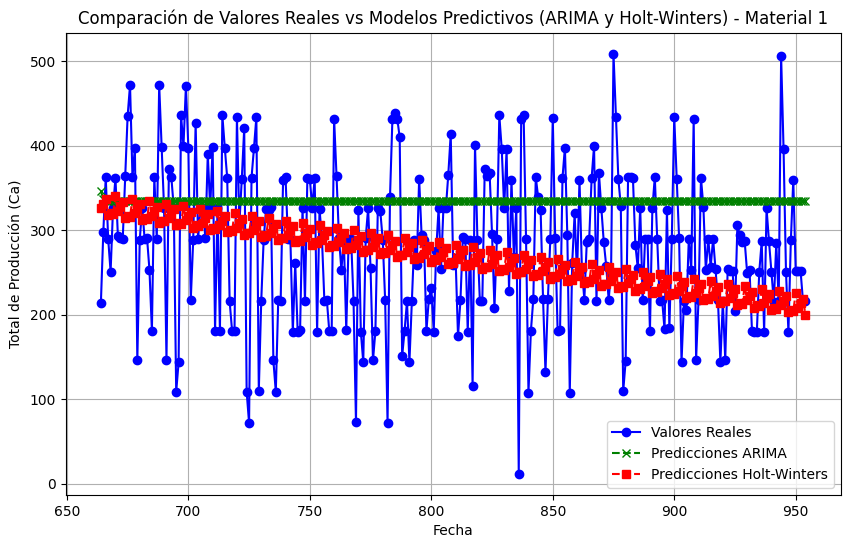

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Definir el conjunto de prueba (últimos 30 días de valores reales para material 1)
test_material_1 = material_1_data['Total de Producción (Ca)'][-291:]

# Definir el conjunto de entrenamiento (todos los datos menos los últimos 30 días)
train_material_1 = material_1_data['Total de Producción (Ca)'][:-291]

# ------------------------------------
# Ajustar el modelo ARIMA
arima_model_material_1 = ARIMA(train_material_1, order=(1, 1, 1))
fitted_arima_material_1 = arima_model_material_1.fit()

# Predicciones del modelo ARIMA para los 30 días de prueba
arima_predictions_material_1 = fitted_arima_material_1.forecast(steps=len(test_material_1))
arima_predictions_material_1 = pd.Series(arima_predictions_material_1, index=test_material_1.index)

# ------------------------------------
# Ajustar el modelo Holt-Winters
hw_model_material_1 = ExponentialSmoothing(train_material_1, trend='add', seasonal='add', seasonal_periods=7).fit()

# Predicciones del modelo Holt-Winters para los 30 días de prueba
hw_predictions_material_1 = hw_model_material_1.forecast(steps=len(test_material_1))
hw_predictions_material_1 = pd.Series(hw_predictions_material_1, index=test_material_1.index)

# ------------------------------------
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(test_material_1.index, test_material_1, label='Valores Reales', color='blue', marker='o')

# Graficar las predicciones de ARIMA
plt.plot(arima_predictions_material_1.index, arima_predictions_material_1, label='Predicciones ARIMA', color='green', linestyle='--', marker='x')

# Graficar las predicciones de Holt-Winters
plt.plot(hw_predictions_material_1.index, hw_predictions_material_1, label='Predicciones Holt-Winters', color='red', linestyle='--', marker='s')

# Añadir títulos y etiquetas
plt.title('Comparación de Valores Reales vs Modelos Predictivos (ARIMA y Holt-Winters) - Material 1')
plt.xlabel('Fecha')
plt.ylabel('Total de Producción (Ca)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

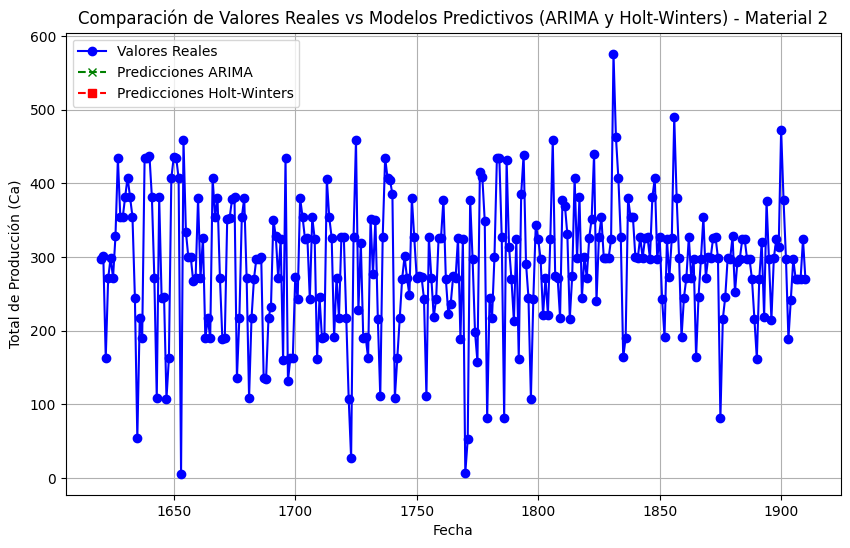

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# Definir el conjunto de prueba (últimos 291 días de valores reales para material 2)
test_material_2 = material_2_data['Total de Producción (Ca)'][-291:]

# Definir el conjunto de entrenamiento (todos los datos menos los últimos 291 días)
train_material_2 = material_2_data['Total de Producción (Ca)'][:-291]

# ------------------------------------
# Ajustar el modelo ARIMA
arima_model_material_2 = ARIMA(train_material_2, order=(1, 1, 1))
fitted_arima_material_2 = arima_model_material_2.fit()

# Predicciones del modelo ARIMA para los 291 días de prueba
arima_predictions_material_2 = fitted_arima_material_2.forecast(steps=len(test_material_2))
arima_predictions_material_2 = pd.Series(arima_predictions_material_2, index=test_material_2.index)

# ------------------------------------
# Ajustar el modelo Holt-Winters
hw_model_material_2 = ExponentialSmoothing(train_material_2, trend='add', seasonal='add', seasonal_periods=7).fit()

# Predicciones del modelo Holt-Winters para los 291 días de prueba
hw_predictions_material_2 = hw_model_material_2.forecast(steps=len(test_material_2))
hw_predictions_material_2 = pd.Series(hw_predictions_material_2, index=test_material_2.index)

# ------------------------------------
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(test_material_2.index, test_material_2, label='Valores Reales', color='blue', marker='o')

# Graficar las predicciones de ARIMA
plt.plot(arima_predictions_material_2.index, arima_predictions_material_2, label='Predicciones ARIMA', color='green', linestyle='--', marker='x')

# Graficar las predicciones de Holt-Winters
plt.plot(hw_predictions_material_2.index, hw_predictions_material_2, label='Predicciones Holt-Winters', color='red', linestyle='--', marker='s')

# Añadir títulos y etiquetas
plt.title('Comparación de Valores Reales vs Modelos Predictivos (ARIMA y Holt-Winters) - Material 2')
plt.xlabel('Fecha')
plt.ylabel('Total de Producción (Ca)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()